In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/laknath123/PDS_final_project_animalshelter/main/data/merged_df.csv")

In [3]:
#df=df[~df['Animal ID'].duplicated()]
print(len(df))
print(len(df['Animal ID'].unique()))

138271
138271


In [4]:
df['Outcome Type']=df['Outcome Type'].fillna("NA")
df['Outcome Type'].unique()

array(['Return to Owner', 'Transfer', 'Relocate', 'Adoption',
       'Euthanasia', 'Died', 'Rto-Adopt', 'Missing', 'NA', 'Disposal'],
      dtype=object)

In [5]:
df

,Unnamed: 0,Animal ID,Name_intakes,DateTime_intake,MonthYear_intake,Found Location,Intake Type,Intake Condition,Animal Type_intake,Sex upon Intake,...,Outcome Type,Outcome Subtype,Animal Type_outcomes,Sex upon Outcome,Age upon Outcome,Breed_outcomes,Color_outcomes,age,seq,indicator_col
0,0,A0061001,A006100,2014-03-07 14:26:00,March 2014,8700 Research in Austin (TX),Public Assist,Normal,Dog,Neutered Male,...,Return to Owner,Unknown,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White,2434.0,1.0,both
1,1,A0061002,A006100,2014-12-19 10:21:00,December 2014,8700 Research Blvd in Austin (TX),Public Assist,Normal,Dog,Neutered Male,...,Return to Owner,Unknown,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White,2721.0,2.0,both
2,2,A0061003,A006100,2017-12-07 14:07:00,December 2017,Colony Creek And Hunters Trace in Austin (TX),Stray,Normal,Dog,Neutered Male,...,Return to Owner,Unknown,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White,3804.0,3.0,both
3,3,A0477591,A047759,2014-04-02 15:55:00,April 2014,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,...,Transfer,Partner,Dog,Neutered Male,10 years,Dachshund,Tricolor,3657.0,1.0,both
4,4,A1340671,A134067,2013-11-16 09:02:00,November 2013,12034 Research Blvd in Austin (TX),Public Assist,Injured,Dog,Neutered Male,...,Return to Owner,Unknown,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White,5875.0,1.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138266,138266,A8554661,A855466,2022-04-18 15:15:00,April 2022,12102 Cottage Promenade Court in Austin (TX),Stray,Normal,Cat,Neutered Male,...,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
138267,138267,A8554691,A855469,2022-04-18 15:47:00,April 2022,Austin (TX),Stray,Medical,Cat,Spayed Female,...,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
138268,138268,A8554701,A855470,2022-04-18 15:46:00,April 2022,207 Franklin Boulevard in Austin (TX),Stray,Normal,Dog,Intact Male,...,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
138269,138269,A8554711,A855471,2022-04-18 15:46:00,April 2022,207 Franklin Boulevard in Austin (TX),Stray,Normal,Dog,Intact Male,...,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [6]:
df.columns

Index(['Unnamed: 0', 'Animal ID', 'Name_intakes', 'DateTime_intake',
       'MonthYear_intake', 'Found Location', 'Intake Type', 'Intake Condition',
       'Animal Type_intake', 'Sex upon Intake', 'Age upon Intake',
       'Breed_intake', 'Color_intake', 'Name_outcomes', 'DateTime_outcomes',
       'MonthYear_outcomes', 'Date of Birth', 'Outcome Type',
       'Outcome Subtype', 'Animal Type_outcomes', 'Sex upon Outcome',
       'Age upon Outcome', 'Breed_outcomes', 'Color_outcomes', 'age', 'seq',
       'indicator_col'],
      dtype='object')

### Analytic 1 - Most common breeds to enter the shelter for Cats and Dogs

We are trying to understand here the most common breeds of cats/dogs at the time they are admiitted into the shelter. We visualize this and display the top 5 breeds for each animal

In [7]:
cd=df[(df["Animal Type_outcomes"]=='Dog') | (df['Animal Type_outcomes']=="Cat")]

In [8]:
temp=cd.groupby(['Animal Type_outcomes','Breed_outcomes'])[['Animal ID']].count().reset_index()
temp.rename(columns={'Animal ID':'Count'},inplace=True)

In [10]:
temp=temp.sort_values(['Animal Type_outcomes','Count'],ascending=False).groupby('Animal Type_outcomes').head(5)
temp

,Animal Type_outcomes,Breed_outcomes,Count
1939,Dog,Pit Bull Mix,8891
1572,Dog,Labrador Retriever Mix,7407
899,Dog,Chihuahua Shorthair Mix,6495
1306,Dog,German Shepherd Mix,3361
1938,Dog,Pit Bull,1914
41,Cat,Domestic Shorthair Mix,32028
40,Cat,Domestic Shorthair,10543
36,Cat,Domestic Medium Hair Mix,3224
29,Cat,Domestic Longhair Mix,1583
87,Cat,Siamese Mix,1346


In [12]:
x1=temp[temp['Animal Type_outcomes']=='Dog']
x2=temp[temp['Animal Type_outcomes']=='Cat']

<ipython-input-13-988b5a6eb855>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(temp['Breed_outcomes'],rotation=45)


Text(0.5, 1.0, 'Most common breeds to enter the shelter for Cats and Dogs')

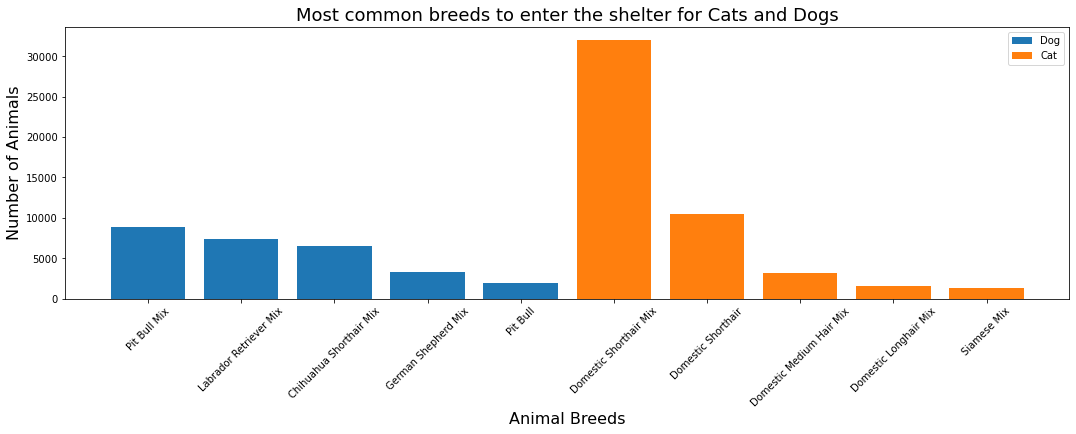

In [13]:
f, ax = plt.subplots(figsize=(18,5))
ax.set_xticklabels(temp['Breed_outcomes'],rotation=45)
plt.bar(x1['Breed_outcomes'],x1['Count'])
plt.bar(x2['Breed_outcomes'],x2['Count'])
plt.legend(temp['Animal Type_outcomes'].unique())
plt.xlabel('Animal Breeds', fontsize=16)
plt.ylabel('Number of Animals', fontsize=16)
plt.title("Most common breeds to enter the shelter for Cats and Dogs",fontsize=18)

At the time of admission into the shelter it can be observed that Pitbull Mixes lead the Dog cateogry while the Cat category is lead by the Domestic Shorthair Mix

### Analytic 2: Most and least common animal types that enter the shelter

Here we are trying to understand if there any significant animals besides cats/dogs which are enetering the shelter. This will help us realize whether to simply concentrate our focus on common pets like Cats/Dogs or also explore other animals.

In [14]:
temp=df.groupby(['Animal Type_outcomes'])[['Animal ID']].count().reset_index()
temp.rename(columns={'Animal ID':'Count'},inplace=True)
temp

,Animal Type_outcomes,Count
0,Bird,658
1,Cat,51879
2,Dog,77458
3,Livestock,24
4,Other,7316


<ipython-input-15-572c3960b8a1>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(temp['Animal Type_outcomes'],rotation=45)


Text(0.5, 1.0, 'Most and least common animal types to enter the shelter')

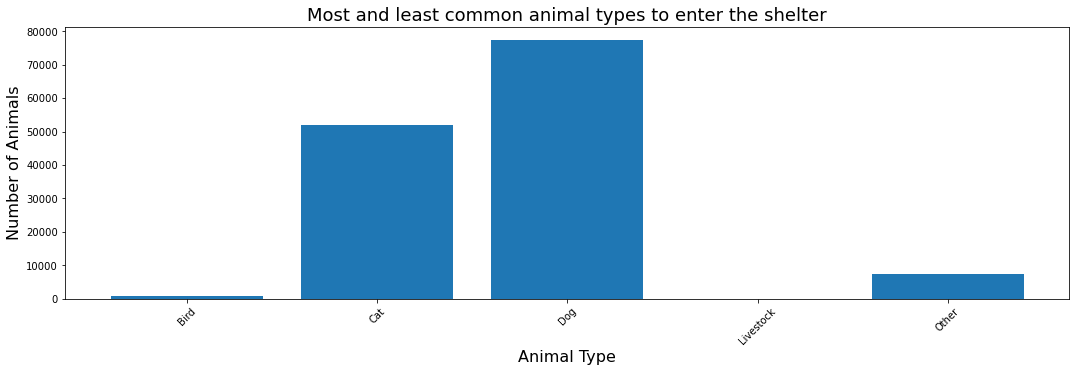

In [15]:
f, ax = plt.subplots(figsize=(18,5))
ax.set_xticklabels(temp['Animal Type_outcomes'],rotation=45)
plt.bar(temp['Animal Type_outcomes'],temp['Count'])
plt.xlabel('Animal Type', fontsize=16)
plt.ylabel('Number of Animals', fontsize=16)
plt.title("Most and least common animal types to enter the shelter",fontsize=18)

While we see some cases of livestock, Birds and other animals they are in overshadowed by the sheer number of cats/dogs entering the shelter. We will hence concentrate on these animals and now proceed to understand their adoption numbers

### Analytic 3: Most common cat and dog breeds to be adopted

This part uses the same logic as Analytic 1 but instead pulls out the numbers for the top breeds getting adopted

<ipython-input-16-f148aafe4973>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(temp['Breed_outcomes'],rotation=45)


Text(0.5, 1.0, 'Most common cat/dog breeds to be adopted')

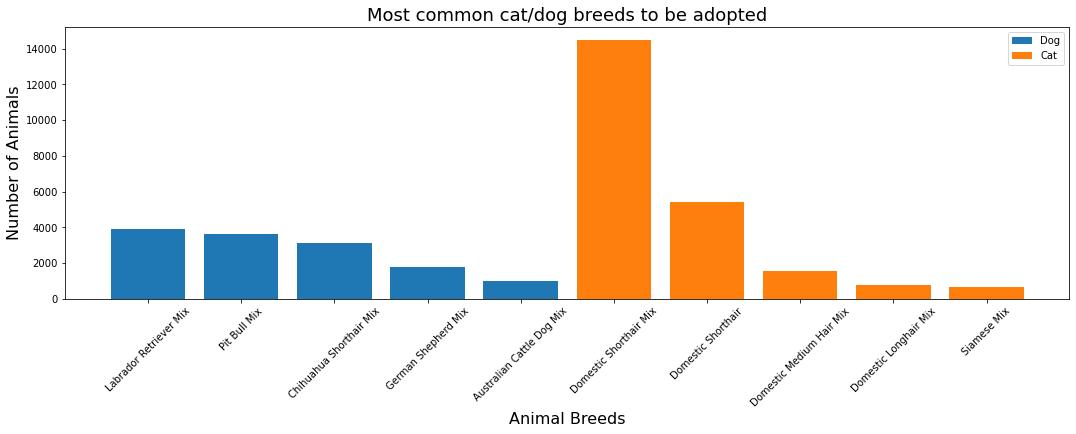

In [16]:
temp_df=df[df["Outcome Type"]=="Adoption"]
cd=temp_df[(temp_df["Animal Type_outcomes"]=='Dog') | (temp_df['Animal Type_outcomes']=="Cat")]
temp=cd.groupby(['Animal Type_outcomes','Breed_outcomes'])[['Animal ID']].count().reset_index()
temp.rename(columns={'Animal ID':'Count'},inplace=True)
temp=temp.sort_values(['Animal Type_outcomes','Count'],ascending=False).groupby('Animal Type_outcomes').head(5)
x1=temp[temp['Animal Type_outcomes']=='Dog']
x2=temp[temp['Animal Type_outcomes']=='Cat']
f, ax = plt.subplots(figsize=(18,5))
ax.set_xticklabels(temp['Breed_outcomes'],rotation=45)
plt.bar(x1['Breed_outcomes'],x1['Count'])
plt.bar(x2['Breed_outcomes'],x2['Count'])
plt.legend(temp['Animal Type_outcomes'].unique())
plt.xlabel('Animal Breeds', fontsize=16)
plt.ylabel('Number of Animals', fontsize=16)
plt.title("Most common cat/dog breeds to be adopted",fontsize=18)

We can see that in terms of adoption Labrador Retriever Mix leads the Dogs category and Domestic Shorthair Mix leads the cats category

Analytic 4: Exploring characteristics leading to Euthanasia

Now that we have performed temporal and adoption analysis the analysis will deep dive into something more specific. It is common knowledge that shelter usually euthanize animals for a variety of reasons. While the debate on this continues the shelter can defnitely take steps towards trying to lessen the number of euthanized animals. We will try to understand from the data why euthanaisa incidents are happening in the first place

<ipython-input-18-b6a81004a5cf>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(temp['Outcome Subtype'],rotation=45)


Text(0.5, 1.0, 'Distibution of euthanized animals by Outcome Sub Type')

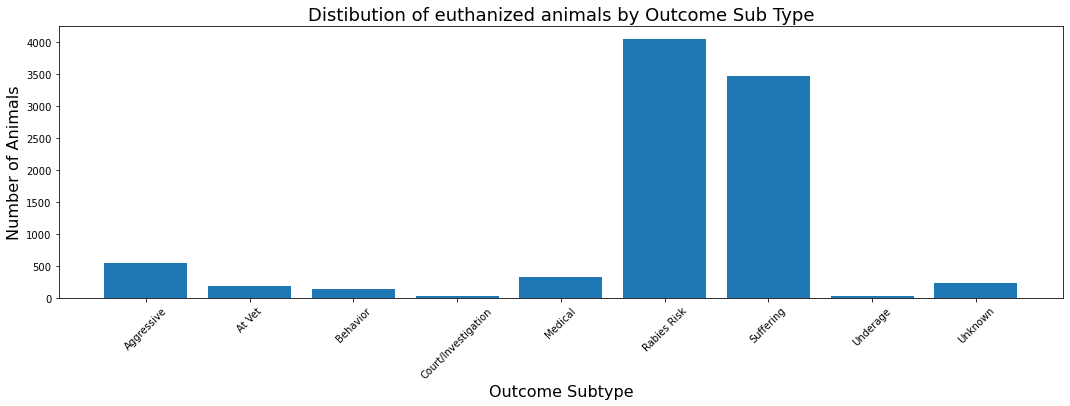

In [18]:
cd=df[df["Outcome Type"]=="Euthanasia"]
temp=cd.groupby(['Outcome Subtype'])[['Animal ID']].count().reset_index()
temp.rename(columns={'Animal ID':'Count'},inplace=True)
f, ax = plt.subplots(figsize=(18,5))
ax.set_xticklabels(temp['Outcome Subtype'],rotation=45)
plt.bar(temp['Outcome Subtype'],temp['Count'])
plt.xlabel('Outcome Subtype', fontsize=16)
plt.ylabel('Number of Animals', fontsize=16)
plt.title("Distibution of euthanized animals by Outcome Sub Type",fontsize=18)

In [19]:
df["Outcome Type"].unique()

array(['Return to Owner', 'Transfer', 'Relocate', 'Adoption',
       'Euthanasia', 'Died', 'Rto-Adopt', 'Missing', 'NA', 'Disposal'],
      dtype=object)

In [20]:
euthanasia_request=len(df[df["Intake Type"]=="Euthanasia Request"])

In [21]:
total_euthanized=len(df[(df["Intake Type"]=="Euthanasia Request") & (df['Outcome Type']=="Euthanasia")])

In [22]:
print("Of the total animals that were admitted with a request to be euthanized the actual % euthanized were: "+str((total_euthanized/euthanasia_request)*100))

Of the total animals that were admitted with a request to be euthanized the actual % euthanized were: 77.60617760617761


<ipython-input-23-76020a77c2ed>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(temp['Intake Type'],rotation=45)


Text(0.5, 1.0, 'Distribution of euthanized number of animals by Intake Type')

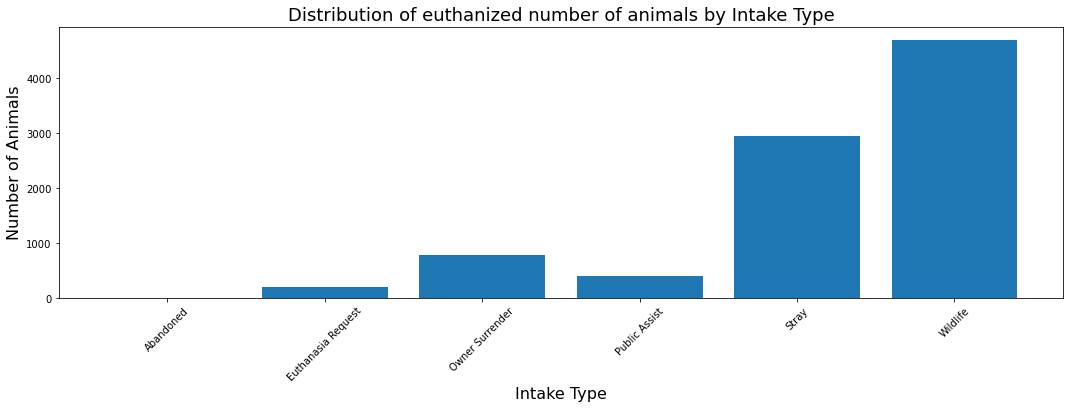

In [23]:
cd=df[df["Outcome Type"]=="Euthanasia"]
temp=cd.groupby(['Intake Type'])[['Animal ID']].count().reset_index()
temp.rename(columns={'Animal ID':'Count'},inplace=True)
f, ax = plt.subplots(figsize=(18,5))
ax.set_xticklabels(temp['Intake Type'],rotation=45)
plt.bar(temp['Intake Type'],temp['Count'])
plt.xlabel('Intake Type', fontsize=16)
plt.ylabel('Number of Animals', fontsize=16)
plt.title("Distribution of euthanized number of animals by Intake Type",fontsize=18)

In [24]:
df.columns

Index(['Unnamed: 0', 'Animal ID', 'Name_intakes', 'DateTime_intake',
       'MonthYear_intake', 'Found Location', 'Intake Type', 'Intake Condition',
       'Animal Type_intake', 'Sex upon Intake', 'Age upon Intake',
       'Breed_intake', 'Color_intake', 'Name_outcomes', 'DateTime_outcomes',
       'MonthYear_outcomes', 'Date of Birth', 'Outcome Type',
       'Outcome Subtype', 'Animal Type_outcomes', 'Sex upon Outcome',
       'Age upon Outcome', 'Breed_outcomes', 'Color_outcomes', 'age', 'seq',
       'indicator_col'],
      dtype='object')

### *Euthanasia Analysis Conclusions*:

Totally 6.5% of the animals in the shelter ended up getting euthanized for some reason or the other. Of the animals admitted into the shelter with a euthanaisa request about 78% ended up getting euthanized. On doing some further analysis on the possible reasons why these animals were euthanized we see Rabies Risk and Suffering as the two leading causes of euthanaisa. It is interesting to note that "Aggressive" and "Behavior" are also reasons leading to about 600 animals getting euthanized. These are definitely areas where the shelter can work to reduce euthanized animals. When we evaluate the number of animals getting euthanized by Intake Type, "Wildlife" and "Stray" are leading intake types for these animals. 

### Analytic 5 - Distribution of all animals in the shelter by outcome type

We want to understand the percentage of animals that fall under each outcome type. We visualize this using a horizontol bar chart

In [25]:
d={}
for x in df['Outcome Type'].unique():
    y=(len(df[df["Outcome Type"]==x])/len(df['Animal ID'].unique()))*100
    d[x]=y
    print("Out of the total animals that entered the shelter the % of animals with outcome "+str(x)+" are "+str(y))

Out of the total animals that entered the shelter the % of animals with outcome Return to Owner are 16.577590384100787
Out of the total animals that entered the shelter the % of animals with outcome Transfer are 28.707393451989212
Out of the total animals that entered the shelter the % of animals with outcome Relocate are 0.017357218794975086
Out of the total animals that entered the shelter the % of animals with outcome Adoption are 45.40503793275524
Out of the total animals that entered the shelter the % of animals with outcome Euthanasia are 6.550180442753723
Out of the total animals that entered the shelter the % of animals with outcome Died are 0.9300576404307483
Out of the total animals that entered the shelter the % of animals with outcome Rto-Adopt are 0.6306456162174281
Out of the total animals that entered the shelter the % of animals with outcome Missing are 0.051348438935134626
Out of the total animals that entered the shelter the % of animals with outcome NA are 0.67693153

Text(0, 0.5, 'Outcome Type')

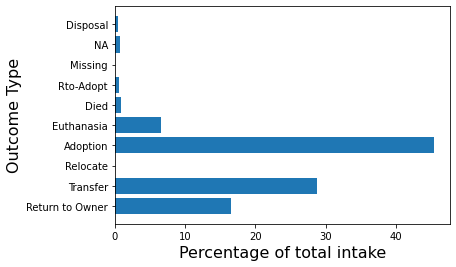

In [26]:
fig,ax=plt.subplots()
names = list(d.keys())
values = list(d.values())

plt.barh(range(len(d)), values, tick_label=names)
plt.xlabel('Percentage of total intake', fontsize=16)
plt.ylabel('Outcome Type', fontsize=16)

We observe that around 45% of all animals admitted to the shelter end up getting adopted and almost 29% get transferred.
The shelter would ideally like to maximize the adoption rate and reduce the euthanasia, death rates

### Analytic 6 : Age Distribution

We want to understand the distribution of the age values for animals entering the shelter and the ones that get adopted. We shall focus our analysis on dogs and cats as these are the animals that end up getting adopted the highest.

In [28]:
df['age_t']=df['age']/30

In [29]:
len(df)

138271

In [30]:
df[(df['Animal Type_intake']=="Dog")|(df['Animal Type_intake']=="Cat")]['age_t']

0          81.133333
1          90.700000
2         126.800000
3         121.900000
4         195.833333
             ...    
138266           NaN
138267           NaN
138268           NaN
138269           NaN
138270           NaN
Name: age_t, Length: 130226, dtype: float64

Text(0.5, 1.0, 'Distribution of ages for animals that entered the shelter')

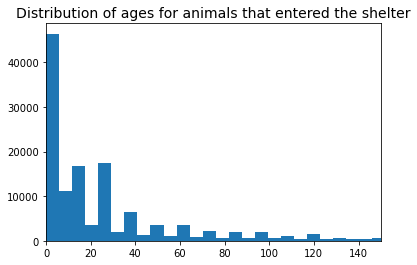

In [31]:
plt.hist(df[(df['Animal Type_intake']=="Dog")|(df['Animal Type_intake']=="Cat")]['age_t'], bins=50)
plt.xlim(0,150)
plt.title("Distribution of ages for animals that entered the shelter",fontsize=14)

Text(0.5, 1.0, 'Distribution of ages for animals that got adopted')

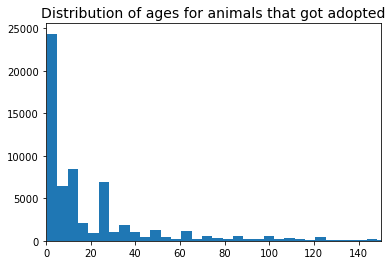

In [32]:
plt.hist(df[(df['Outcome Type']=="Adoption")&((df['Animal Type_intake']=="Dog")|(df['Animal Type_intake']=="Cat"))]['age_t'], bins=50)
plt.xlim(0, 150)
plt.title("Distribution of ages for animals that got adopted",fontsize=14)

Both the age distributions for animals entering the shelter and the ones getting adopted are skewed towards the right with most of animals being in the range if 0-20 months. There are a small amount of animals in the range of 80-120 months. 

### Analytic 7 : Is either sex of cats/dogs more likely to get adopted

Another interesting analysis we perform is trying to understand if either sex Male/Female for cats/dogs are preferred by adopters. This is to understand if there is any preference/bias among people adopting animals from the shelter.

In [33]:
temp=df[(df['Animal Type_intake']=="Dog")|(df['Animal Type_intake']=="Cat")]

In [35]:
cd=df[df["Outcome Type"]=="Adoption"]
cd

,Unnamed: 0,Animal ID,Name_intakes,DateTime_intake,MonthYear_intake,Found Location,Intake Type,Intake Condition,Animal Type_intake,Sex upon Intake,...,Outcome Subtype,Animal Type_outcomes,Sex upon Outcome,Age upon Outcome,Breed_outcomes,Color_outcomes,age,seq,indicator_col,age_t
13,13,A2009221,A200922,2013-10-03 15:47:00,October 2013,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,...,Foster,Dog,Neutered Male,16 years,Dachshund Mix,Black/Tan,5894.0,1.0,both,196.466667
15,15,A2104571,A210457,2016-09-28 12:05:00,September 2016,4424 S Mopac #412 in Austin (TX),Public Assist,Aged,Dog,Neutered Male,...,Foster,Dog,Neutered Male,17 years,Chihuahua Shorthair,Tan/Black,6338.0,1.0,both,211.266667
24,24,A2260691,A226069,2015-10-06 12:29:00,October 2015,Wheless Ln And Berkman Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,...,Foster,Dog,Neutered Male,15 years,Labrador Retriever/Beagle,Sable/White,5612.0,1.0,both,187.066667
34,34,A2490871,A249087,2016-08-17 14:05:00,August 2016,E 6Th St And Pedernales in Austin (TX),Stray,Normal,Dog,Spayed Female,...,Foster,Dog,Spayed Female,15 years,German Shepherd Mix,Black/Brown,5796.0,1.0,both,193.200000
50,50,A2745461,A274546,2013-11-13 18:16:00,November 2013,Manchaca And Slaughter in Austin (TX),Stray,Normal,Dog,Spayed Female,...,Unknown,Dog,Spayed Female,11 years,Pointer Mix,Tricolor,4193.0,1.0,both,139.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,138146,A8551481,A855148,2022-04-14 10:59:00,April 2022,Austin (TX),Owner Surrender,Normal,Dog,Intact Female,...,Unknown,Dog,Spayed Female,1 year,Chihuahua Shorthair,Brown,366.0,1.0,both,12.200000
138151,138151,A8551591,A855159,2022-04-14 13:22:00,April 2022,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,...,Unknown,Dog,Spayed Female,7 years,Chihuahua Shorthair Mix,Black/White,2647.0,1.0,both,88.233333
138166,138166,A8551981,A855198,2022-04-14 18:01:00,April 2022,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,...,Unknown,Dog,Neutered Male,2 years,Labrador Retriever Mix,Black/White,732.0,1.0,both,24.400000
138188,138188,A8552751,A855275,2022-04-15 12:31:00,April 2022,Austin (TX),Owner Surrender,Normal,Dog,Intact Female,...,Unknown,Dog,Spayed Female,2 months,Labrador Retriever Mix,Brown Brindle/White,69.0,1.0,both,2.300000


In [36]:
l=[]
for i in df['Sex upon Intake']:
    if i=="Unknown":
        l.append("Unknown")
    else:
        l.append(i.split(" ")[1])
df['sex']=l

<ipython-input-37-8c1b8062be55>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(temp['sex'],rotation=45)


Text(0.5, 1.0, 'Which Sex is more likely to get adopted?')

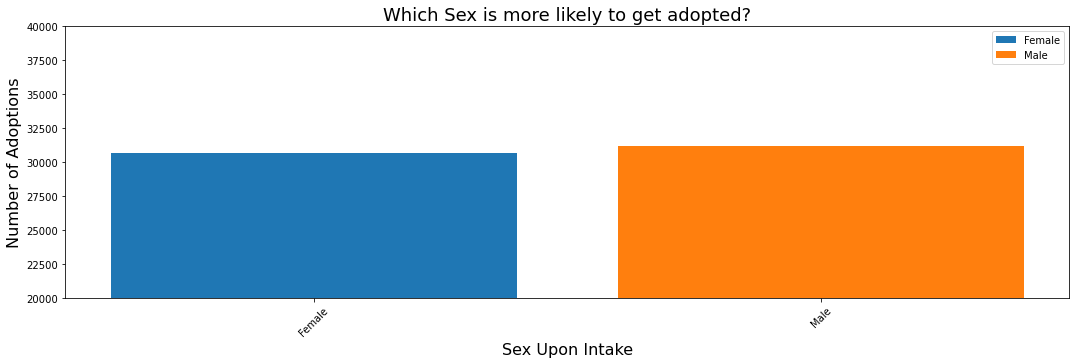

In [37]:
temp_df=df[(df["Outcome Type"]=="Adoption") & (df['sex']!="Unknown")]
cd=temp_df[(temp_df["Animal Type_outcomes"]=='Dog') | (temp_df['Animal Type_outcomes']=="Cat")]
temp=cd.groupby(['sex'])[['Animal ID']].count().reset_index()
temp.rename(columns={'Animal ID':'Count'},inplace=True)
f, ax = plt.subplots(figsize=(18,5))
ax.set_xticklabels(temp['sex'],rotation=45)
x1=temp[temp['sex']=='Female']
x2=temp[temp['sex']=='Male']
plt.bar(x1['sex'],x1['Count'])
plt.bar(x2['sex'],x2['Count'])
plt.ylim(20000,40000)
plt.legend(temp['sex'].unique())
plt.xlabel("Sex Upon Intake",fontsize=16)
plt.ylabel('Number of Adoptions',fontsize=16)
plt.title("Which Sex is more likely to get adopted?",fontsize=18)

We see that Females and Males have the approximate same rate of adoption and there is no specific bias among adopters while choosing animals with respect to Sex.

### Analytic 8: Hypothesis Testing 

We perform a two-tailed hypothesis test to understand whether there is any statistical difference in the proportions of dogs getting adopted vs cats. We use the scipy.stats python library for this test

In [46]:
import scipy.stats
from scipy.stats import t
import math

In [40]:
n1=len(df[df['Animal Type_intake']=="Dog"])
n2=len(df[df['Animal Type_intake']=="Cat"])

In [41]:
t1=len(df[(df['Animal Type_intake']=="Dog")&(df['Outcome Type']=="Adoption")])
t2=len(df[(df['Animal Type_intake']=="Cat")&(df['Outcome Type']=="Adoption")])

In [48]:
p1=t1/n1
p2=t2/n2
pcap=(t1+t1)/(n1+n2)
se=math.sqrt(pcap*(1-pcap)*((1/n1)+(1/n2)))
t_score=(p2-p1)/se
degrees_of_freedom=n1+n2-2
pvalue=1-scipy.stats.t.cdf(abs(t_score), degrees_of_freedom)
print(2*pvalue)

0.12958903536552402


The pvalue obtained is of 0.129 which is much higher than the cutoff of 0.05 at a confidence level of 95%
Therefore, we fail to reject the null hypothesis and conclude that there is no evidence of a statistical difference between the proportions of dogs getting adopted vs cats.